In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv(r"C:/Users/john.tan/OneDrive - Cogent Holdings Pte. Ltd/Documents/PowerBI/train.csv")
df_test = pd.read_csv(r"C:/Users/john.tan/OneDrive - Cogent Holdings Pte. Ltd/Documents/PowerBI/test.csv")

null_counts=df_train.select_dtypes('int64').isnull().sum() #Find columns with null values
null_counts[null_counts > 0]

Series([], dtype: int64)

In [81]:
df_train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [82]:
null_counts=df_train.select_dtypes('float64').isnull().sum() #Find columns with null values
null_counts[null_counts > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [83]:
df_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [84]:
null_counts=df_train.select_dtypes('object').isnull().sum() #Find columns with null values
null_counts[null_counts > 0]

Series([], dtype: int64)

In [85]:
mapping={'yes':1,'no':0}

for df in [df_train, df_test]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)
    
df_train[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [86]:
data = df_train[df_train['v2a1'].isnull()].head()
columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


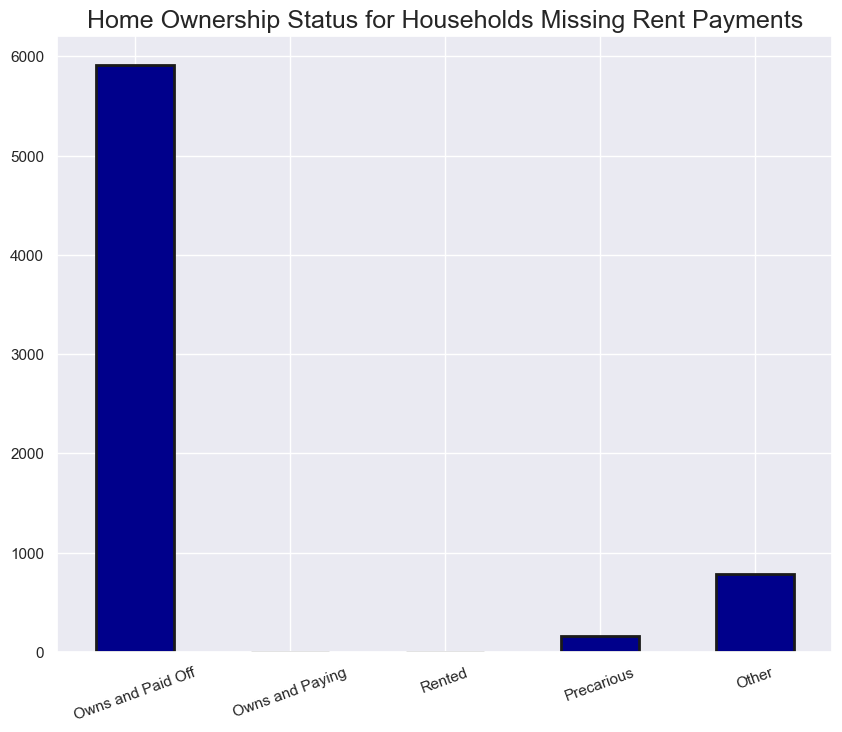

In [87]:
# Variables indicating home ownership
own_variables = [x for x in df_train if x.startswith('tipo')]

# Plot of the home ownership variables for home missing rent payments
df_train.loc[df_train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'darkblue',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [88]:
for df in [df_train, df_test]:
    df['v2a1'].fillna(value=0, inplace=True) #when fully paid, rent payment =0. 0 for null values

df_train[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [89]:
heads = df_train.loc[df_train['parentesco1'] == 1].copy() #heads of household
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

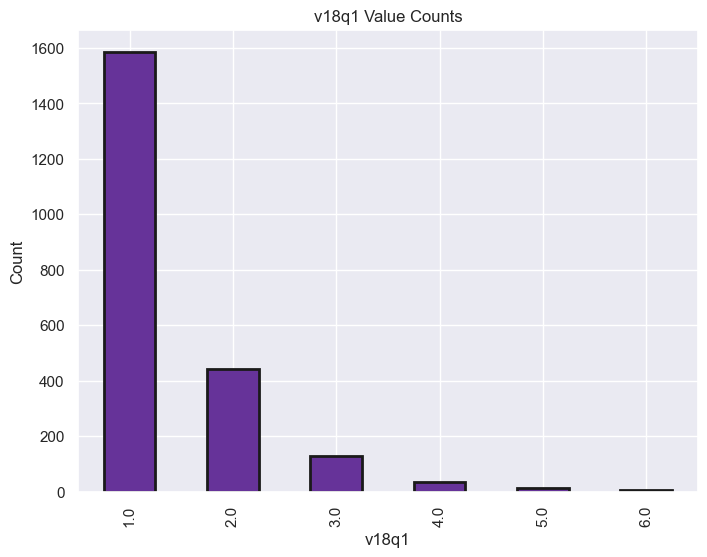

In [90]:
plt.figure(figsize = (8, 6))
col='v18q1'
df_train[col].value_counts().sort_index().plot.bar(color = 'rebeccapurple',
                                             edgecolor = 'k',
                                             linewidth = 2)
plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
plt.show();

In [91]:
for df in [df_train, df_test]:
    df['v18q1'].fillna(value=0, inplace=True)
df_train[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

In [92]:
df_train[df_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [93]:
df_train.loc[df_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [94]:
df_train.loc[(df_train['rez_esc'].isnull() & 
                     ((df_train['age'] > 7) & (df_train['age'] < 17)))]['age'].describe() #1 null value

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [95]:
df_train[(df_train['age'] ==10) & df_train['rez_esc'].isnull()].head()
df_train[(df_train['Id'] =='ID_f012e4242')].head() #there's just 1 member in household age==10

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [96]:
for df in [df_train, df_test]:
    df['rez_esc'].fillna(value=0, inplace=True)
df_train[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

In [97]:
data = df_train[df_train['meaneduc'].isnull()].head() #ave years of education for adults
columns=['edjefe','edjefa','instlevel1','instlevel2']

data[columns][data[columns]['instlevel1'] > 0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [98]:
for df in [df_train, df_test]:
    df['meaneduc'].fillna(value=0, inplace=True) #'meaneduc' is null when level of education is 0
df_train[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

In [99]:
data = df_train[df_train['SQBmeaned'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1'] > 0].describe()
#edjefe years of education of male head of household
#edjefa years of education of female head of household
#instlevel1 =1 no level of education
#instlevel2 =2 incomplete primary

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [100]:
for df in [df_train, df_test]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
df_train[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [101]:
null_counts = df_train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) #entire train dataset

Series([], dtype: int64)

In [102]:
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [103]:
df_train[df_train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']] #check 1 household

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [104]:
households_head = df_train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = df_train.loc[df_train['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [105]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different Target value.


In [106]:
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(df_train[(df_train['idhogar'] == household) & (df_train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    df_train.loc[df_train['idhogar'] == household, 'Target'] = true_target    

# Groupby household and get the number of unique values
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


In [107]:
target_counts = heads['Target'].value_counts().sort_index()
target_counts
# 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

<AxesSubplot: title={'center': 'Target vs Total_Count'}>

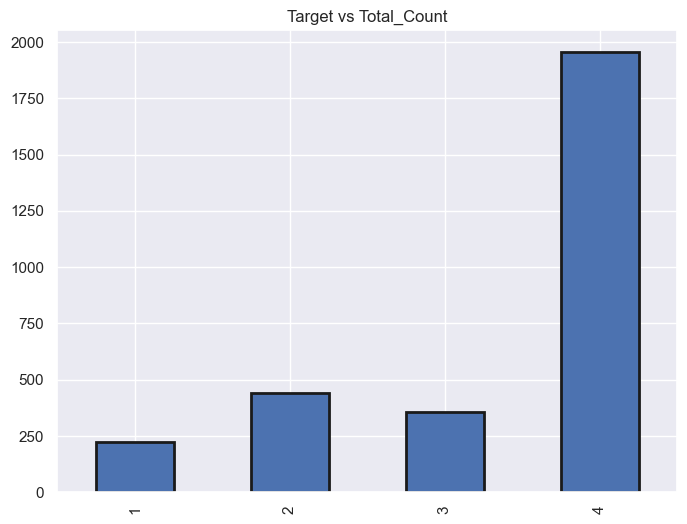

In [108]:
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")

In [109]:
print(df_train.shape)
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

for df in [df_train, df_test]:
    df.drop(columns = cols,inplace=True)
print(df_train.shape)

(9557, 143)
(9557, 134)


In [110]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [111]:
heads = df_train.loc[df_train['parentesco1'] == 1, :] #check redundant household variables
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

In [112]:
corr_matrix = heads.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [113]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


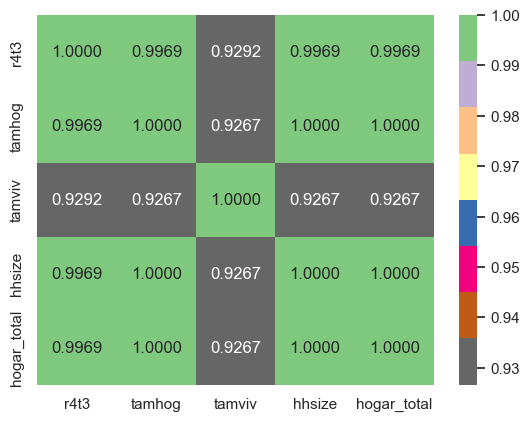

In [114]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.4f');

In [115]:
#check bias in dataset
import scipy.stats
bias_tab = pd.crosstab(df_train['r4t3'],df_train['hogar_total'])
Observed_Values = bias_tab.values

b = scipy.stats.chi2_contingency(bias_tab)
Expected_Values = b[3]
no_of_rows = len(bias_tab.iloc[0:2,0])
no_of_columns = len(bias_tab.iloc[0,0:2])
df = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-", chi_square_statistic)

alpha=0.05
critical_value=chi2.ppf(q=1-alpha, df=df)
print('critical_value:', critical_value)

p_value = 1-chi2.cdf(x=chi_square_statistic, df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:', chi_square_statistic)
print('critical_value:', critical_value)
print('p-value:', p_value)

if chi_square_statistic >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value <= alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [116]:
bias_tab1 = pd.crosstab(df_train['tipovivi3'], df_train['v2a1'])
Observed_Values_1 = bias_tab1.values

b = scipy.stats.chi2_contingency(bias_tab1)
Expected_Values = b[3]
no_of_rows = len(bias_tab1.iloc[0:2,0])
no_of_columns = len(bias_tab1.iloc[0,0:2])
df = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values_1, Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
print("chi-square statistic:-", chi_square_statistic)

alpha=0.05
critical_value = chi2.ppf(q=1-alpha,df=df)
print('critical_value:', critical_value)
p_value = 1-chi2.cdf(x=chi_square_statistic, df=df)
print('p-value:', p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:', chi_square_statistic)
print('critical_value:', critical_value)
print('p-value:', p_value)

if chi_square_statistic >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value <= alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 1542.6427745783096
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1542.6427745783096
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [117]:
cols=['tamhog', 'hogar_total', 'r4t3']
for df in [df_train, df_test]:
    df.drop(columns = cols,inplace=True) #r4t3, tamhog, tamviv, hhsize, hogar_total highly correlated
df_train.shape

(9557, 131)

In [118]:
ind = df_train[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [119]:
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['female']

In [120]:
for df in [df_train, df_test]:
    df.drop(columns = 'male', inplace=True) #opposite of male. remove 'male' flag
df_train.shape

(9557, 130)

In [121]:
for df in [df_train, df_test]:
    df.drop(columns = 'area2',inplace=True)
df_train.shape
# area1 =1 zona urbana 
# area2 =2 zona rural 
#area2 redundant because we have a column indicating if the house is in a urban zone

(9557, 129)

In [122]:
cols=['Id','idhogar']
for df in [df_train, df_test]:
    df.drop(columns = cols,inplace=True)
df_train.shape

(9557, 127)

In [123]:
df_train.iloc[:,0:-1] #random forest classifier

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,1,1,1,0,0,0,0,0,1,43
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,1,1,0,0,0,0,0,1,67
2,0.0,0,8,0,1,1,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,92
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,3,1,0,0,0,0,0,1,17
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,3,1,0,0,0,0,0,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,46
9553,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,2
9554,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,50
9555,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,26


In [124]:
df_train.iloc[:,-1]

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [125]:
x_features = df_train.iloc[:,0:-1] # feature without target
y_features = df_train.iloc[:,-1] # only target
print(x_features.shape)
print(y_features.shape)

(9557, 126)
(9557,)


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.2, random_state=1)
rfclassifier = RandomForestClassifier()

In [127]:
rfclassifier.fit(x_train, y_train)

RandomForestClassifier()

In [128]:
y_predict = rfclassifier.predict(x_test)

In [129]:
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9524058577405857
[[ 135    1    0   21]
 [   0  290    0   27]
 [   0    2  194   37]
 [   0    2    1 1202]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92       157
           2       0.98      0.91      0.95       317
           3       0.99      0.83      0.91       233
           4       0.93      1.00      0.96      1205

    accuracy                           0.95      1912
   macro avg       0.98      0.90      0.94      1912
weighted avg       0.95      0.95      0.95      1912



In [130]:
y_predict_testdata = rfclassifier.predict(df_test)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [131]:
from sklearn.model_selection import KFold, cross_val_score
seed = 12
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)

rfclassifier = RandomForestClassifier(random_state=10, n_jobs = -1)
print(cross_val_score(rfclassifier, x_features, y_features, cv=kfold, scoring='accuracy'))
results = cross_val_score(rfclassifier, x_features, y_features, cv=kfold, scoring='accuracy')
print(results.mean()*100)

[0.93776151 0.94979079 0.9429618  0.95342752 0.94871795]
94.65319149867865


In [139]:
print(cross_val_score(Model, x_features, y_features, cv=kfold, scoring='accuracy'))
results = cross_val_score(Model, x_features, y_features, cv=kfold, scoring='accuracy')
print(results.mean()*100)

[0.90167364 0.90690377 0.9010989  0.90999477 0.90685505]
90.53052247612918


In [136]:
#GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rfclassifier = RandomForestClassifier(random_state=10)
parameters = {'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid= zip([rfclassifier],[parameters])

best_= None
for i, j in grid:
    a = GridSearchCV(i, param_grid=j, cv=kfold, n_jobs=1)
    a.fit(x_train, y_train)
    if best_ is None:
        best_= a
    elif a.best_score_> best_.best_score_:
        best_= a        
     
print ("Best CV Score",best_.best_score_)
print ("Model Parameters",best_.best_params_)
print("Best Estimator",best_.best_estimator_)

Best CV Score 0.8856769130150426
Model Parameters {'max_depth': 15, 'n_estimators': 300}
Best Estimator RandomForestClassifier(max_depth=15, n_estimators=300, random_state=10)


In [138]:
RFC = best_.best_estimator_
Model = RFC.fit(x_train,y_train)
pred = Model.predict(x_test)

In [140]:
print('Model Score of train data : {}'.format(Model.score(x_train, y_train)))
print('Model Score of test data : {}'.format(Model.score(x_test, y_test)))

Model Score of train data : 0.9720078482668411
Model Score of test data : 0.9053347280334728


In [133]:
rfclassifier.fit(x_features, y_features)
labels = list(x_features)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rfclassifier.feature_importances_})
feature_importances = feature_importances[feature_importances.importance > 0.015]
feature_importances.head()

,feature,importance
0,v2a1,0.018444
2,rooms,0.025385
9,r4h2,0.020309
10,r4h3,0.019571
11,r4m1,0.015397


In [144]:
TopFeatures = feature_importances.sort_values(by='importance', ascending=True).head(30).index
TopFeatures

Index(['paredblolad', 'r4m1', 'r4m2', 'cielorazo', 'bedrooms', 'v2a1',
       'escolari', 'hogar_adul', 'hhsize', 'r4h3', 'r4m3', 'tamviv', 'r4h2',
       'age', 'edjefa', 'r4t2', 'r4t1', 'rooms', 'qmobilephone', 'hogar_nin',
       'edjefe', 'overcrowding', 'dependency', 'meaneduc'],
      dtype='object', name='feature')

In [147]:
X_data = df_train.drop('Target',axis=1)
Y_data = df_train.Target
X_data_Top = X_data[TopFeatures]
X_train,X_test,Y_train,Y_test = train_test_split(X_data_Top, Y_data, test_size=0.2, stratify=Y_data, random_state=10)

Model_1 = RFC.fit(X_train, Y_train)
pred = Model_1.predict(X_test)

confusion_matrix(Y_test, pred)

array([[ 124,    7,    0,   24],
       [   7,  219,    5,   81],
       [   0,    8,  178,   58],
       [   3,    5,    7, 1186]], dtype=int64)

In [148]:
f1_score(Y_test, pred, average='weighted')

0.8882520163770737

In [149]:
accuracy_score(Y_test, pred)

0.8927824267782427

In [134]:
y_predict_testdata = rfclassifier.predict(df_test)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

Text(0.5, 0, 'Importance')

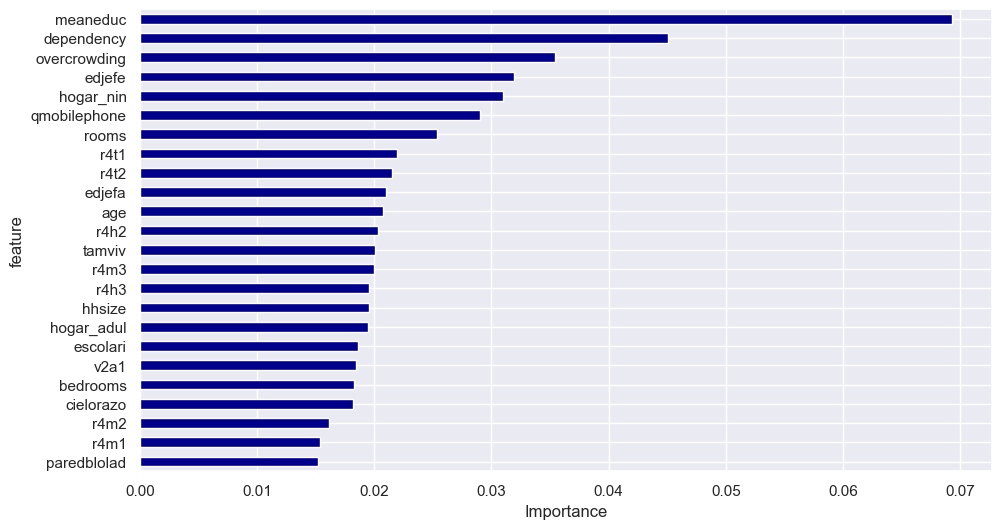

In [135]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature', inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6), color = feature_importances.positive.map({True: 'darkblue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
#https://www.kaggle.com/code/masditechblog/income-qualification-prediction/notebook
#https://github.com/JogeshDhiman/Income-Qualification-Project/blob/master/Income%20Qualification.ipynb